## Analysing Andes spectra from individual exposures - example notebook

In this notebook we show how to access spectra from single exposures.


In [1]:
import sys 
import os 
import h5py 
import numpy as np 
from astropy.io import fits
from astropy.table import Table, join
import pandas as pd
import fitsio

from desitarget.cmx.cmx_targetmask import cmx_mask  
import desispec.io

# --- plotting --- 
import matplotlib as mpl
import matplotlib.pyplot as plt

from platform import python_version
print("python version: ", python_version())

python version:  3.6.6


### Set up directories, etc, to read Andes data

Choose the same tile and night as used for the truth table

In [2]:
%set_env DESI_SPECTRO_REDUX=/global/cfs/cdirs/desi/spectro/redux/andes/
%set_env SPECPROD= 

tile = '66003'
date = '20200315'
expid=['00055654', '00055655', '00055656'] #each of the 3 exposures has a unique ID. These are the same for all observations of this tile, in this case.
spectrograph = ['0','1', '2', '3', '4', '5', '6' ,'7', '8', '9']
camera=['b', 'r', 'z']

env: DESI_SPECTRO_REDUX=/global/cfs/cdirs/desi/spectro/redux/andes/
env: SPECPROD=


In [3]:
dirname = os.path.join(os.getenv("DESI_SPECTRO_REDUX"), os.getenv("SPECPROD"), "tiles", tile, date)

#filenames are of the form: 'cframe-z9-00055654'
filename = "cframe-{}{}-{}.fits".format(camera[0], spectrograph[0], expid[0])
specfilename = os.path.join(dirname, filename)
print(specfilename)

/global/cfs/cdirs/desi/spectro/redux/andes/tiles/66003/20200315/cframe-b0-00055654.fits


In [4]:
#read in this cframe fits file, for 1 exposure, 1 arm, 1 petal (=500 fibers)
DM = fitsio.FITS(specfilename)
DM


  file: /global/cfs/cdirs/desi/spectro/redux/andes/tiles/66003/20200315/cframe-b0-00055654.fits
  mode: READONLY
  extnum hdutype         hduname[v]
  0      IMAGE_HDU       FLUX
  1      IMAGE_HDU       IVAR
  2      IMAGE_HDU       MASK
  3      IMAGE_HDU       WAVELENGTH
  4      IMAGE_HDU       RESOLUTION
  5      BINARY_TBL      FIBERMAP
  6      IMAGE_HDU       CHI2PIX
  7      BINARY_TBL      SCORES

### Reading in fluxes, wavelengths, noise, resolution matrix

In [5]:
#read in the data to numpy arrays
flux_b = DM[0].read()
wave_b = DM[3].read()
ivar_b = DM[1].read()
resolution_b = DM[4].read()

In [6]:
#check the dimensions
print(np.shape(flux_b), np.shape(wave_b), np.shape(ivar_b), np.shape(resolution_b))

(500, 2751) (2751,) (500, 2751) (500, 11, 2751)


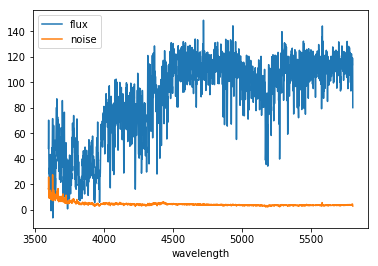

In [7]:
#plot the spectrum for a random target
plt.plot(wave_b, flux_b[10], label='flux')
plt.plot(wave_b, np.sqrt(1/ivar_b[10]), label='noise')
plt.xlabel('wavelength')
plt.legend()

### Reading in the fibermap

The fibermap is a binary table, with a bunch of columns. We're only interested in the TargetID for now, so we will read that out directlt.

In [8]:
#print info and column names
DM[5]


  file: /global/cfs/cdirs/desi/spectro/redux/andes/tiles/66003/20200315/cframe-b0-00055654.fits
  extension: 5
  type: BINARY_TBL
  extname: FIBERMAP
  rows: 500
  column info:
    TARGETID            i8  
    PETAL_LOC           i2  
    DEVICE_LOC          i4  
    LOCATION            i8  
    FIBER               i4  
    FIBERSTATUS         i4  
    TARGET_RA           f8  
    TARGET_DEC          f8  
    PMRA                f4  
    PMDEC               f4  
    PMRA_IVAR           f4  
    PMDEC_IVAR          f4  
    REF_EPOCH           f4  
    LAMBDA_REF          f4  
    FA_TARGET           i8  
    FA_TYPE             u1  
    OBJTYPE             S3  
    FIBERASSIGN_X       f4  
    FIBERASSIGN_Y       f4  
    NUMTARGET           i2  
    PRIORITY            i4  
    SUBPRIORITY         f8  
    OBSCONDITIONS       i4  
    NUMOBS_MORE         i8  
    RELEASE             i2  
    BRICKID             i4  
    BRICKNAME           S8  
    BRICK_OBJID         i4  
    MORPHT

In [9]:
targetID = DM[5]['TARGETID'].read()

In [10]:
print(len(targetID))

500
